In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf
import utils.eval_metrics as em

utils.py Loading


In [2]:
def HDI_evaluate_clustering(k, n_samples, small=False):
    """ 
    Evaluate the HDI dataset using the dunn index
    """
    data = read_data()
    # Nb of criteria
    K = data.columns.shape[0] # Nb of criteria
    L = data.iloc[0]["co2prod"].shape[0] # Length of the time series

    if small:
        all_groups = ["PAK", "SDN", "BDI", "HTI","EST", "CZE", "MLT", "SGP", "IRL", "CHE", "ISL", "NZL", "SWE"]
        data = data.loc[all_groups]
        title_prefix = "Small "
    else:
        title_prefix = "Big "
    
    N = data.index.shape[0]

    W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
    Q = [1, 0.03, 5, 0.01, 0.5, 0.5] # Indifference thresholds
    P = [10, 0.4, 20, 0.3, 5, 5]

    Weight_vector = [1/L for _ in range(L)] # Equal weights times

    alternatives = data.index # Alternatives are the countries

    phi_c_all = pf.get_all_Phi_c(data, P, Q, L) # compute all mono criterion flows series
    PHI = pf.PHI_all(phi_c_all, W, N, L, K) # Aggregate to the net flow series
    PHI_df = pd.DataFrame(PHI, index=data.index, columns=np.arange(1990, 2023)) # Transform PHI into a dataframe with ISO3 as index and years as columns


    eta = pf.get_eta_matrix(data, phi_c_all, W, L)
    agg_eta = pf.aggregate_all_series(eta, Weight_vector)
    dist_matrix = pd.DataFrame(agg_eta, index=alternatives, columns=alternatives)

    # Transform phi_c_all into a dataframe with ISO3 and variable names as columns (each cell is a np.array)
    phi_c_all = np.array(phi_c_all)
    variable_names = data.columns
    phi_c_all_df = pd.DataFrame(index=alternatives, columns=variable_names)
    for i in range(K):
        phi_c_all_df[variable_names[i]] = [phi_c_all[i][j] for j in range(N)]

    # Get the results of the clustering
    p2km_results, gkm_results_clusters, trad_km_results = cf.get_results(k, data, dist_matrix, PHI_df, n_samples)

    title = title_prefix + "Dataset - Dunn Index on"

    # Evaluate the results of the clustering + plot the results
    em.evaluate_result_repartition_on_data(p2km_results, gkm_results_clusters, trad_km_results, data, method=em.evaluate_results_on_data, title=title + " the data")
    em.evaluate_result_repartition_on_data(p2km_results, gkm_results_clusters, trad_km_results, PHI_df, method=em.evaluate_results_on_net_flow_scores, title=title + " the net flow scores")
    em.evaluate_result_repartition_on_data(p2km_results, gkm_results_clusters, trad_km_results, phi_c_all_df, method=em.evaluate_results_on_mono_criteria, title=title + " the mono criteria scores")
    

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]
100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


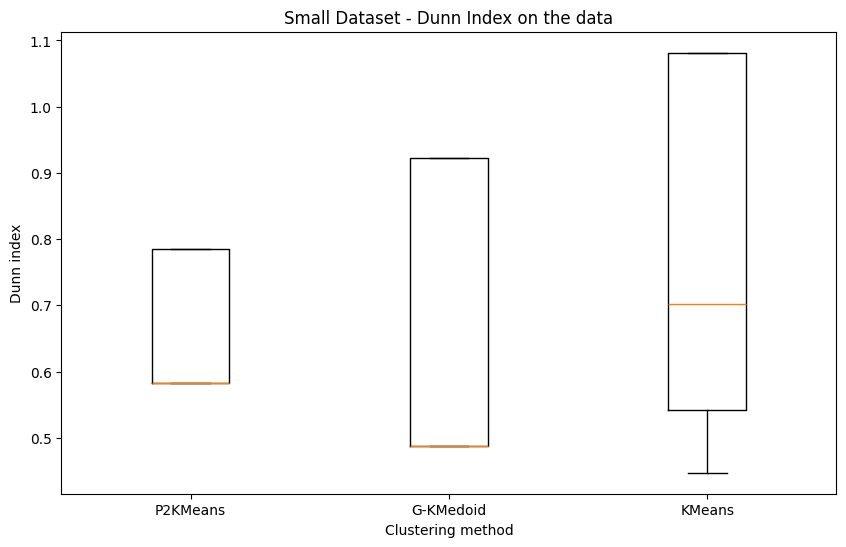

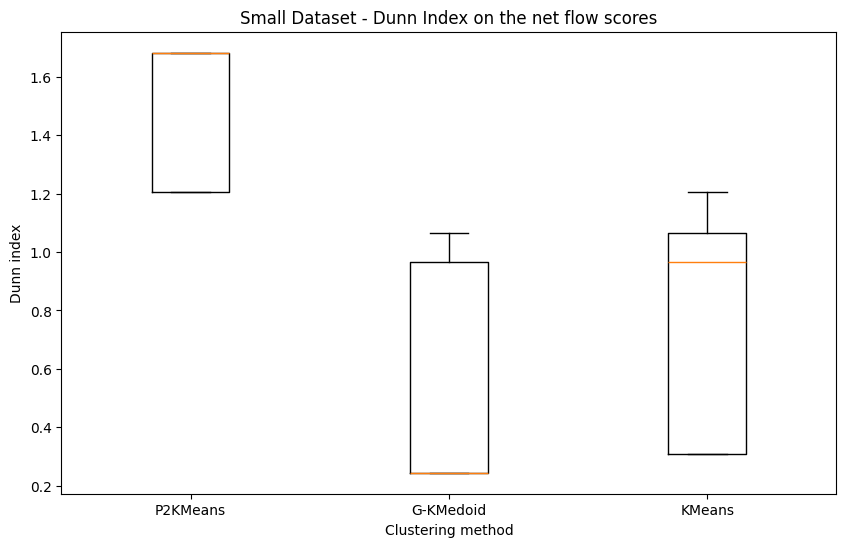

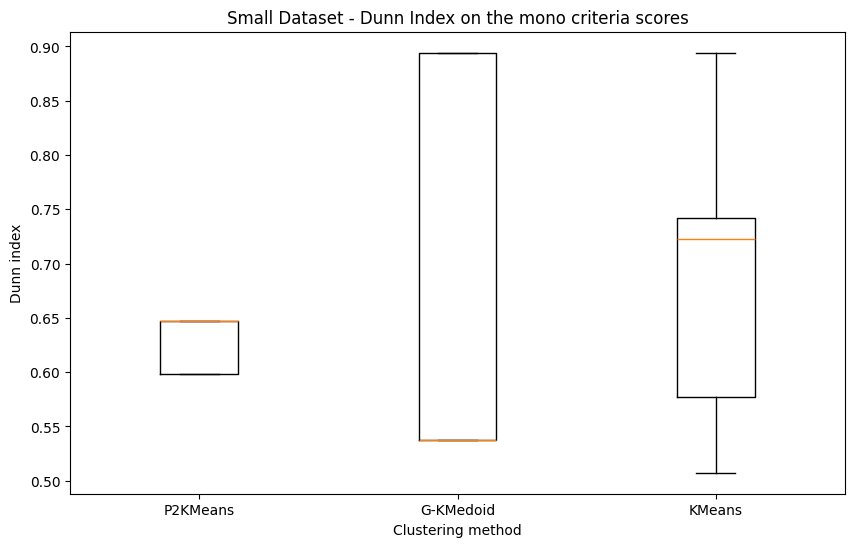

In [3]:
HDI_evaluate_clustering(3, 100, small=True)

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]
100%|██████████| 100/100 [03:03<00:00,  1.84s/it]


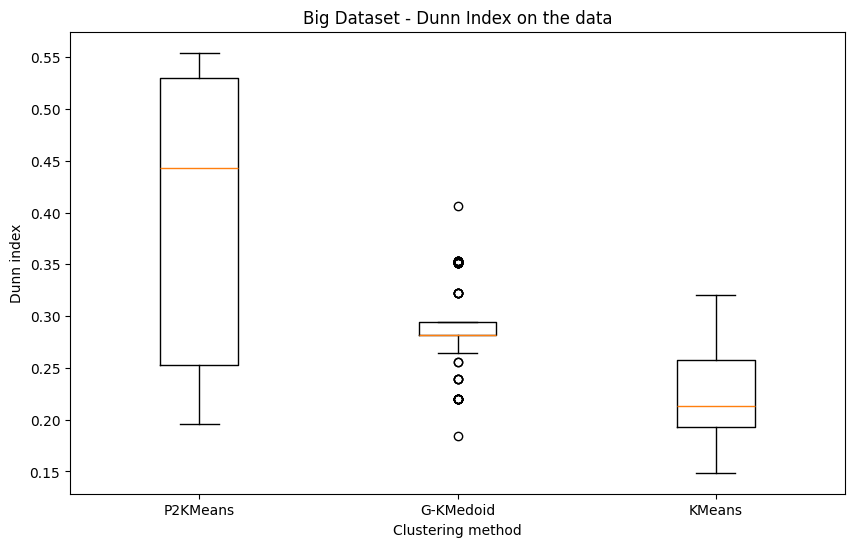

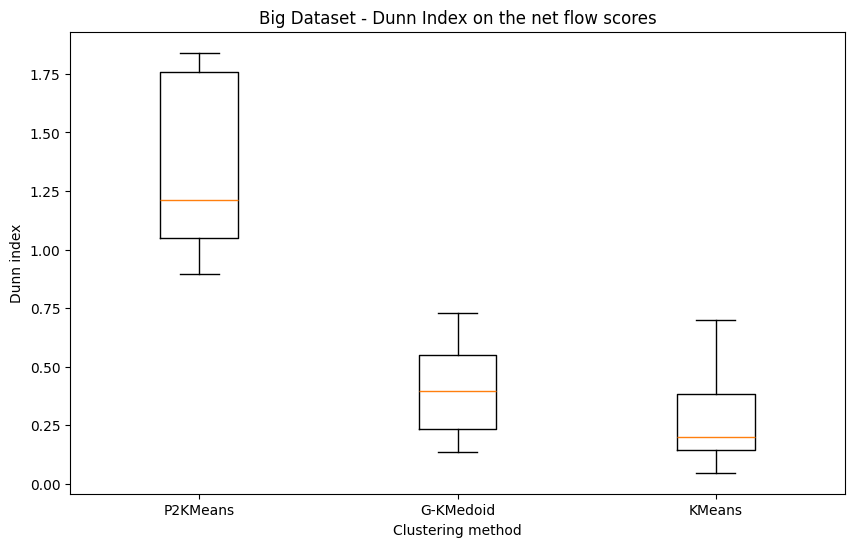

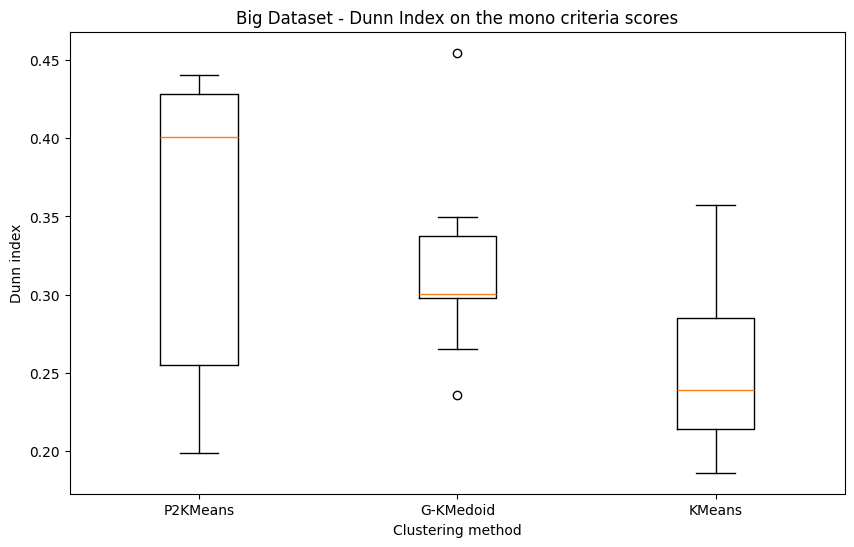

In [4]:
HDI_evaluate_clustering(5, 100, small=False)